In [223]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import MetaTrader5 as mt5

In [224]:
# connect to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [225]:
# request 1000 bars of Apple (AAPL) stock from MT5
rates = mt5.copy_rates_from_pos("BTCUSD.m", mt5.TIMEFRAME_D1, 0,4000)

# shut down connection
mt5.shutdown()

# convert to pandas DataFrame
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')

print(df.head())

        time     open     high      low    close  tick_volume  spread  \
0 2020-04-06  7089.36  7301.54  7036.51  7207.34        15246    2335   
1 2020-04-07  7205.44  7444.21  7058.79  7108.54        36850    2171   
2 2020-04-08  7108.54  7407.81  7071.78  7299.15        31937     798   
3 2020-04-09  7298.35  7376.07  7092.14  7281.57        43950    2382   
4 2020-04-10  7281.57  7303.44  6736.31  6900.25        38821    1770   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0  


In [226]:
df.shape

(2001, 8)

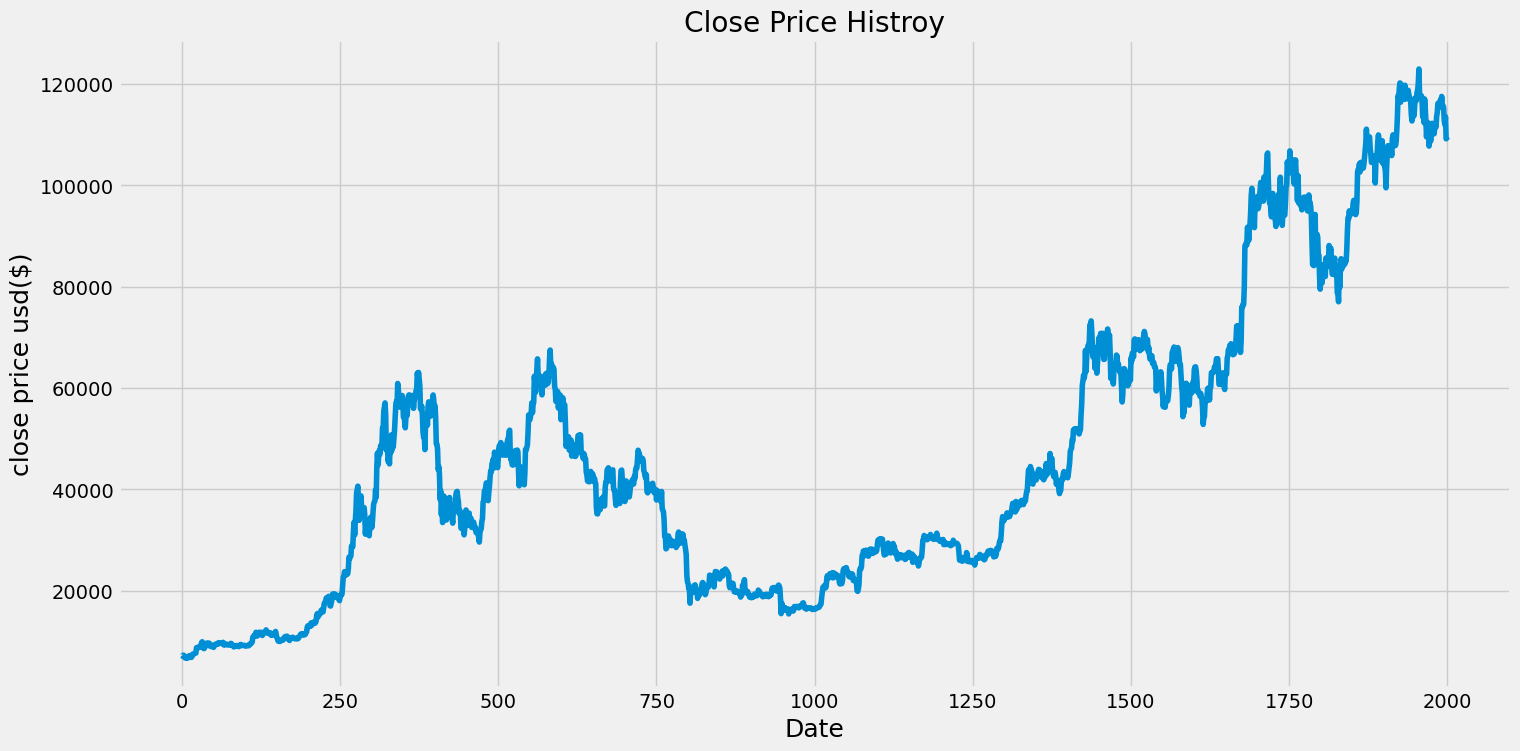

In [227]:
plt.figure(figsize=(16,8))
plt.title('Close Price Histroy')
plt.plot(df['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price usd($)',fontsize=18)
plt.show()

In [228]:
data=df.filter(['close'])
data

,close
0,7207.34
1,7108.54
2,7299.15
3,7281.57
4,6900.25
...,...
1996,111998.41
1997,113560.91
1998,109207.91
1999,109343.91


In [229]:
dataset=data.values
dataset

array([[  7207.34],
       [  7108.54],
       [  7299.15],
       ...,
       [109207.91],
       [109343.91],
       [109574.91]])

In [230]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1601

In [231]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00419019],
       [0.0033403 ],
       [0.00497996],
       ...,
       [0.88161453],
       [0.88278442],
       [0.88477152]])

In [232]:
train_data=scaled_data[0:training_data_len,:]
train_data

array([[0.00419019],
       [0.0033403 ],
       [0.00497996],
       ...,
       [0.46898774],
       [0.46427101],
       [0.48989828]])

In [233]:

X_train=[]
y_train=[]
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [234]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [235]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1541, 60, 1)

In [236]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\mbugu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [237]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [238]:
model.fit(X_train,y_train,batch_size=1,epochs=1)

1541/1541 ━━━━━━━━━━━━━━━━━━━━ 100s 49ms/step - loss: 0.0020


In [239]:
test_data=scaled_data[training_data_len-60:,:]

In [240]:
x_test=[]
y_test=dataset[training_data_len:,:]


In [241]:
test_data.shape

(460, 1)

In [242]:
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test    

[array([0.4747252 , 0.46639144, 0.47027961, 0.45916735, 0.46628701,
        0.47524589, 0.48599488, 0.47467273, 0.45425724, 0.443828  ,
        0.42681819, 0.44080262, 0.4345972 , 0.42587857, 0.4403738 ,
        0.43589733, 0.43724176, 0.43700356, 0.44636296, 0.45913174,
        0.49066086, 0.49841449, 0.49717398, 0.49088125, 0.51834869,
        0.52176486, 0.52473751, 0.52814654, 0.50856667, 0.51011626,
        0.50362344, 0.52217415, 0.52507205, 0.52707884, 0.52152039,
        0.51123308, 0.49729217, 0.49856882, 0.48009836, 0.46139901,
        0.4506741 , 0.40992416, 0.42871229, 0.41662533, 0.45396124,
        0.46485226, 0.46658198, 0.44523772, 0.44828959, 0.46320133,
        0.45097114, 0.42944477, 0.4522341 , 0.45312038, 0.45676288,
        0.45034688, 0.45233922, 0.46898774, 0.46427101, 0.48989828]),
 array([0.46639144, 0.47027961, 0.45916735, 0.46628701, 0.47524589,
        0.48599488, 0.47467273, 0.45425724, 0.443828  , 0.42681819,
        0.44080262, 0.4345972 , 0.42587857, 0.

In [243]:
x_test=np.array(x_test)

In [244]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [245]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step


In [246]:
#rmse
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

3431.827449860182

C:\Users\mbugu\AppData\Local\Temp\ipykernel_2748\152391500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


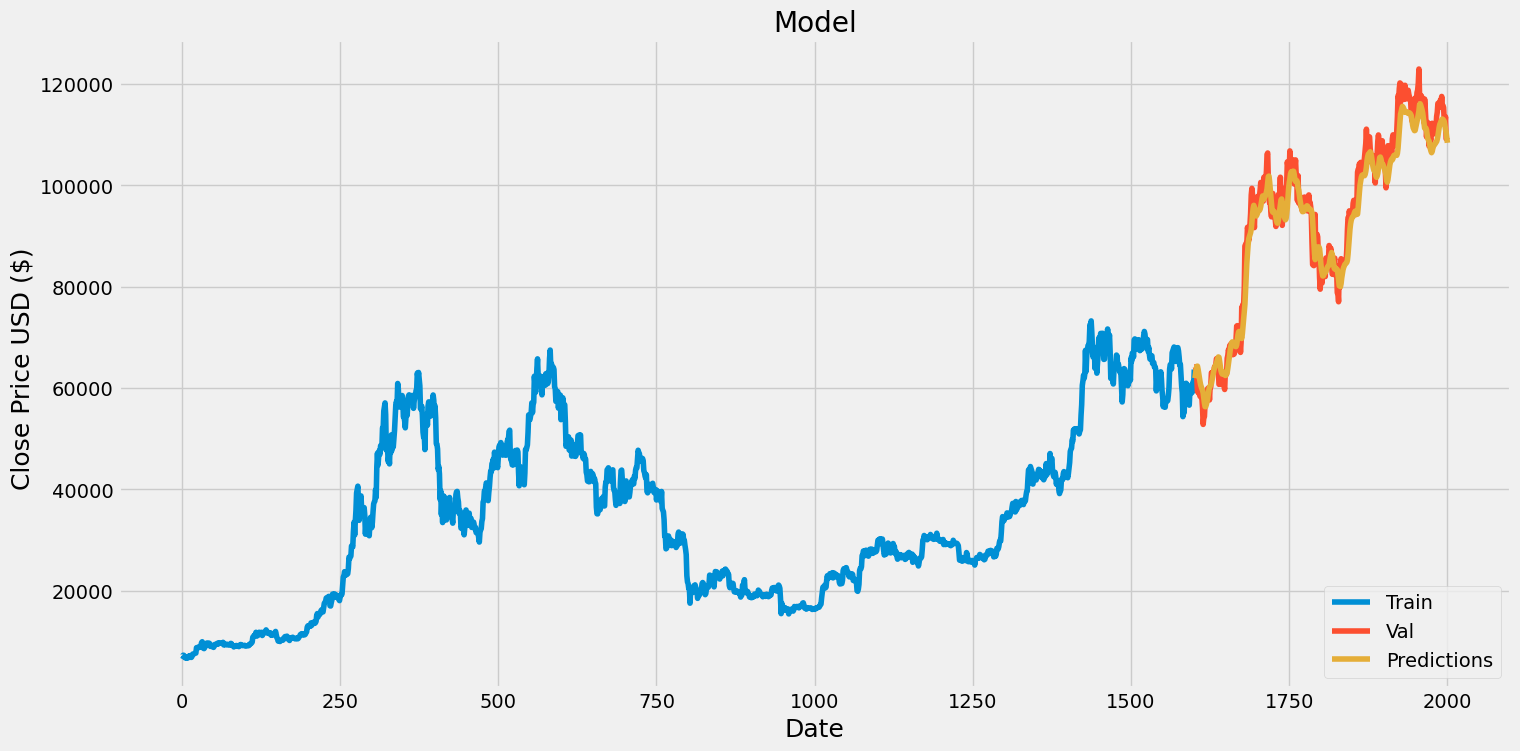

In [247]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($) ',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [248]:
valid

,close,Predictions
1601,64162.59,61973.410156
1602,64210.43,62903.398438
1603,63439.16,63757.679688
1604,61858.44,64302.734375
1605,59296.60,64343.953125
...,...,...
1996,111998.41,111941.328125
1997,113560.91,111053.015625
1998,109207.91,110521.359375
1999,109343.91,109452.515625


In [253]:
# connect to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [254]:
# request 1000 bars of Apple (AAPL) stock from MT5
myrates = mt5.copy_rates_from_pos("BTCUSD.m", mt5.TIMEFRAME_D1, 1,400)

# shut down connection
mt5.shutdown()

# convert to pandas DataFrame
newdf = pd.DataFrame(myrates)
newdf['time'] = pd.to_datetime(newdf['time'], unit='s')

#print(newdf.tail())
newdf=df.filter(['close'])
newdf

,close
0,7207.34
1,7108.54
2,7299.15
3,7281.57
4,6900.25
...,...
1996,111998.41
1997,113560.91
1998,109207.91
1999,109343.91


In [255]:
last_60_days=newdf[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)

In [ ]:
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_price=model.predict(X_test)
predicted_price=scaler.inverse_transform(predicted_price)
print(predicted_price," 109343.91")
print("difference: ",109343.91-predicted_price)